<a href="https://colab.research.google.com/github/JEEVANTH00JC/Enhancement/blob/main/How_to_best_spend_your_coins_on_eFootball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Probability
# Inputs
number_of_spins = 150  # @param {type:"integer"}
total_cards = 150  # @param {type:"integer"}
specific_cards = 3  # @param {type:"integer"}

def factorial(x):
    if x == 0 or x == 1:
        return 1
    return x * factorial(x - 1)

def combinations(n, k):
    return factorial(n) / (factorial(k) * factorial(n - k))

def cumulative_probability(n, total_cards=150, specific_cards=3):
    # Probability of drawing at least one specific card
    prob_not_drawing = 1.0

    for i in range(n):
        prob_not_drawing *= (total_cards - specific_cards - i) / (total_cards - i)

    prob_at_least_one = 1 - prob_not_drawing

    # Probability of drawing all specific cards
    if number_of_spins < specific_cards:
        prob_all_specific = 0  # Not enough draws to get all specific cards
    else:
        # Calculate the total ways to draw 'n' cards from 'total_cards'
        total_ways = combinations(total_cards, n)

        # Calculate ways to draw 'n' cards including all specific cards
        # We need to choose (specific_cards) from (n) and (n - specific_cards) from remaining cards
        ways_to_draw_all_specific = combinations(total_cards - specific_cards, number_of_spins - specific_cards)

        prob_all_specific = ways_to_draw_all_specific / total_ways

    return prob_at_least_one, prob_all_specific

# Calculate probabilities
prob_at_least_one, prob_all_specific = cumulative_probability(number_of_spins, total_cards, specific_cards)

# Print the results as percentages
print(f"The cumulative probability of drawing at least one of the {specific_cards} specific cards in {number_of_spins} draws: {prob_at_least_one * 100:.2f}%")
print(f"The cumulative probability of drawing all {specific_cards} specific cards in {number_of_spins} draws: {prob_all_specific * 100:.4f}%")




The cumulative probability of drawing at least one of the 2 specific cards in 110 draws: 93.02%
The cumulative probability of drawing all 2 specific cards in 110 draws: 53.6465%


In [ ]:
import numpy as np

# @title Expected cost situation
num_players = 110  # @param {type:"integer"}
num_legends = 1    # @param {type:"integer"}
num_trials = 15000  # @param {type:"integer"}

def simulate_pack_opening_one_player_at_a_time(num_players, num_legends, num_trials=1000):
    total_spins_to_get_all_legends = []

    for _ in range(num_trials):
        pack = list(range(1, num_players + 1))  # Players numbered from 1 to num_players
        legends = set(range(1, num_legends + 1))  # Legends are the first num_legends players
        spins = 0

        while legends:
            spins += 1
            player_pulled = np.random.choice(pack, 1, replace=False)[0]
            pack.remove(player_pulled)
            if player_pulled in legends:
                legends.remove(player_pulled)

        total_spins_to_get_all_legends.append(spins)

    return np.mean(total_spins_to_get_all_legends)

def simulate_pack_opening_ten_players_at_a_time(num_players, num_legends, num_trials=1000):
    total_spins_to_get_all_legends = []

    for _ in range(num_trials):
        pack = list(range(1, num_players + 1))  # Players numbered from 1 to num_players
        legends = set(range(1, num_legends + 1))  # Legends are the first num_legends players
        spins = 0

        while legends:
            spins += 1

            # Check if there are fewer than 10 players left in the pack
            num_to_draw = min(10, len(pack))  # Draw up to 10 or as many as left in pack

            if num_to_draw < 10:
                # Switch to one player opening for the remaining players
                players_pulled = np.random.choice(pack, num_to_draw, replace=False)
                pack = [player for player in pack if player not in players_pulled]
                legends -= set(players_pulled)
                # Since we switched to one-player openings, we count spins one at a time
                spins += num_to_draw - 1  # Adjust spins for the players pulled
            else:
                players_pulled = np.random.choice(pack, num_to_draw, replace=False)
                pack = [player for player in pack if player not in players_pulled]
                legends -= set(players_pulled)

        total_spins_to_get_all_legends.append(spins)

    return np.mean(total_spins_to_get_all_legends)

# Run the simulations
average_spins_one_player = simulate_pack_opening_one_player_at_a_time(num_players, num_legends)
average_spins_ten_players = simulate_pack_opening_ten_players_at_a_time(num_players, num_legends)

print(f"Expected number of spins to acquire all {num_legends} legends (one player at a time): {average_spins_one_player:.2f}")
print(f"Expected number of spins to acquire all {num_legends} legends (ten players at a time): {average_spins_ten_players:.2f}")

# Calculate the cost in coins
total_coins_one_player = average_spins_one_player * 100
total_coins_ten_players = average_spins_ten_players * 900

print(f"Expected total coins (one player at a time): {total_coins_one_player:.2f}")
print(f"Expected total coins (ten players at a time): {total_coins_ten_players:.2f}")


Expected number of spins to acquire all 1 legends (one player at a time): 53.60
Expected number of spins to acquire all 1 legends (ten players at a time): 5.90
Expected total coins (one player at a time): 5360.10
Expected total coins (ten players at a time): 5312.70


Players: 10, Legends: 1, One Player Cost: 550.70, Ten Player Cost: 900.00
Players: 10, Legends: 2, One Player Cost: 739.80, Ten Player Cost: 900.00
Players: 10, Legends: 3, One Player Cost: 826.20, Ten Player Cost: 900.00
Players: 11, Legends: 1, One Player Cost: 610.40, Ten Player Cost: 980.10
Players: 11, Legends: 2, One Player Cost: 793.30, Ten Player Cost: 1053.00
Players: 11, Legends: 3, One Player Cost: 895.70, Ten Player Cost: 1133.10
Players: 12, Legends: 1, One Player Cost: 669.70, Ten Player Cost: 1054.80
Players: 12, Legends: 2, One Player Cost: 872.80, Ten Player Cost: 1206.00
Players: 12, Legends: 3, One Player Cost: 985.20, Ten Player Cost: 1300.50
Players: 13, Legends: 1, One Player Cost: 682.60, Ten Player Cost: 1117.80
Players: 13, Legends: 2, One Player Cost: 939.10, Ten Player Cost: 1268.10
Players: 13, Legends: 3, One Player Cost: 1057.40, Ten Player Cost: 1401.30
Players: 14, Legends: 1, One Player Cost: 757.80, Ten Player Cost: 1144.80
Players: 14, Legends: 2, One

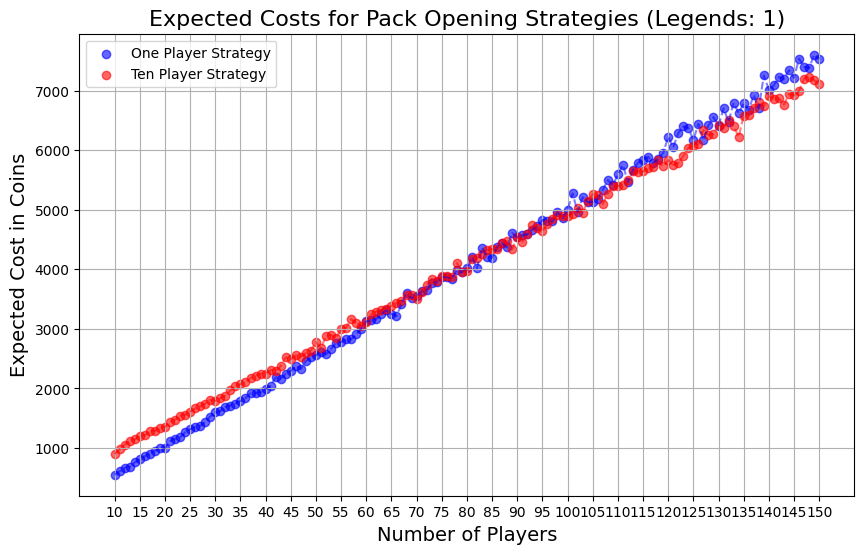

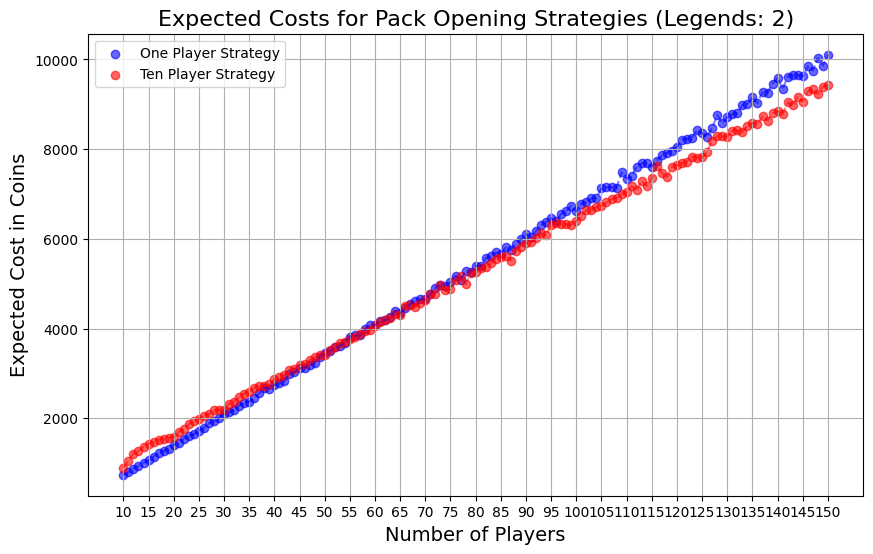

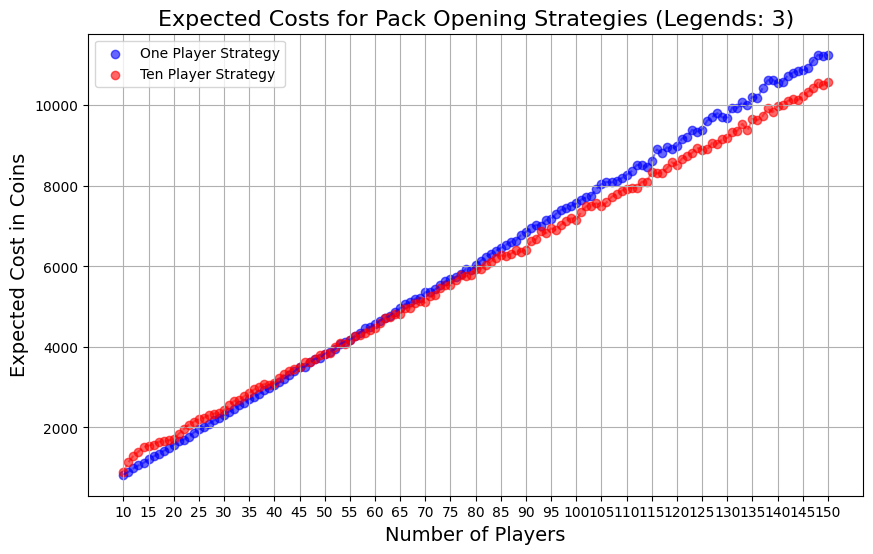

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# @title Optimal Switch Point
# Simulation parameters
num_trials = 1000  # Number of trials for the simulation

def simulate_pack_opening_one_player_at_a_time(num_players, num_legends, num_trials=1000):
    total_spins_to_get_all_legends = []

    for _ in range(num_trials):
        pack = list(range(1, num_players + 1))
        legends = set(range(1, num_legends + 1))
        spins = 0

        while legends:
            spins += 1
            player_pulled = np.random.choice(pack, 1, replace=False)[0]
            pack.remove(player_pulled)
            if player_pulled in legends:
                legends.remove(player_pulled)

        total_spins_to_get_all_legends.append(spins)

    return np.mean(total_spins_to_get_all_legends)

def simulate_pack_opening_ten_players_at_a_time(num_players, num_legends, num_trials=1000):
    total_spins_to_get_all_legends = []

    for _ in range(num_trials):
        pack = list(range(1, num_players + 1))
        legends = set(range(1, num_legends + 1))
        spins = 0

        while legends:
            spins += 1

            num_to_draw = min(10, len(pack))
            players_pulled = np.random.choice(pack, num_to_draw, replace=False)
            pack = [player for player in pack if player not in players_pulled]
            legends -= set(players_pulled)

        total_spins_to_get_all_legends.append(spins)

    return np.mean(total_spins_to_get_all_legends)

# Function to automate testing over varying numbers of players and legends
def find_optimal_strategy(player_range, legend_range):
    results = []

    for num_players in player_range:
        for num_legends in legend_range:
            average_spins_one_player = simulate_pack_opening_one_player_at_a_time(num_players, num_legends)
            average_spins_ten_players = simulate_pack_opening_ten_players_at_a_time(num_players, num_legends)

            total_coins_one_player = average_spins_one_player * 100
            total_coins_ten_players = average_spins_ten_players * 900

            results.append((num_players, num_legends, total_coins_one_player, total_coins_ten_players))

            print(f"Players: {num_players}, Legends: {num_legends}, One Player Cost: {total_coins_one_player:.2f}, Ten Player Cost: {total_coins_ten_players:.2f}")

    return results

# Function to plot the results
def plot_results_by_legends(results):
    # Organizing results by number of legends
    results_by_legends = {1: [], 2: [], 3: []}

    for players, legends, one_player_cost, ten_player_cost in results:
        results_by_legends[legends].append((players, one_player_cost, ten_player_cost))

    # Create a figure
    for num_legends, data in results_by_legends.items():
        players = [result[0] for result in data]
        one_player_costs = [result[1] for result in data]
        ten_player_costs = [result[2] for result in data]

        plt.figure(figsize=(10, 6))
        plt.scatter(players, one_player_costs, color='blue', label='One Player Strategy', alpha=0.6)
        plt.scatter(players, ten_player_costs, color='red', label='Ten Player Strategy', alpha=0.6)

        # Create lines connecting points for clarity
        plt.plot(players, one_player_costs, color='blue', linestyle='--', alpha=0.5)
        plt.plot(players, ten_player_costs, color='red', linestyle='--', alpha=0.5)

        # Setting labels and title
        plt.title(f'Expected Costs for Pack Opening Strategies (Legends: {num_legends})', fontsize=16)
        plt.xlabel('Number of Players', fontsize=14)
        plt.ylabel('Expected Cost in Coins', fontsize=14)
        plt.xticks(range(min(players), max(players) + 1, 5))
        plt.legend()
        plt.grid()

        # Show the plot
        plt.show()

# Define ranges for players and legends
player_range = range(10, 151, 1)  # From 10 to 150 players
legend_range = range(1, 3)  # From 1 to 3 legends

# Find the optimal strategy based on the defined ranges
results = find_optimal_strategy(player_range, legend_range)

# Plot the results
plot_results_by_legends(results)

Players: 10, Legends: 1, One Player Cost: 558.10, Ten Player Cost: 900.00
Players: 10, Legends: 2, One Player Cost: 731.50, Ten Player Cost: 900.00
Players: 10, Legends: 3, One Player Cost: 821.00, Ten Player Cost: 900.00
Players: 11, Legends: 1, One Player Cost: 602.60, Ten Player Cost: 980.10
Players: 11, Legends: 2, One Player Cost: 797.80, Ten Player Cost: 1056.60
Players: 11, Legends: 3, One Player Cost: 901.90, Ten Player Cost: 1154.70
Players: 12, Legends: 1, One Player Cost: 652.50, Ten Player Cost: 1070.10
Players: 12, Legends: 2, One Player Cost: 852.30, Ten Player Cost: 1175.40
Players: 12, Legends: 3, One Player Cost: 971.60, Ten Player Cost: 1330.20
Players: 13, Legends: 1, One Player Cost: 687.40, Ten Player Cost: 1088.10
Players: 13, Legends: 2, One Player Cost: 928.70, Ten Player Cost: 1290.60
Players: 13, Legends: 3, One Player Cost: 1036.70, Ten Player Cost: 1446.30
Players: 14, Legends: 1, One Player Cost: 731.00, Ten Player Cost: 1170.00
Players: 14, Legends: 2, One

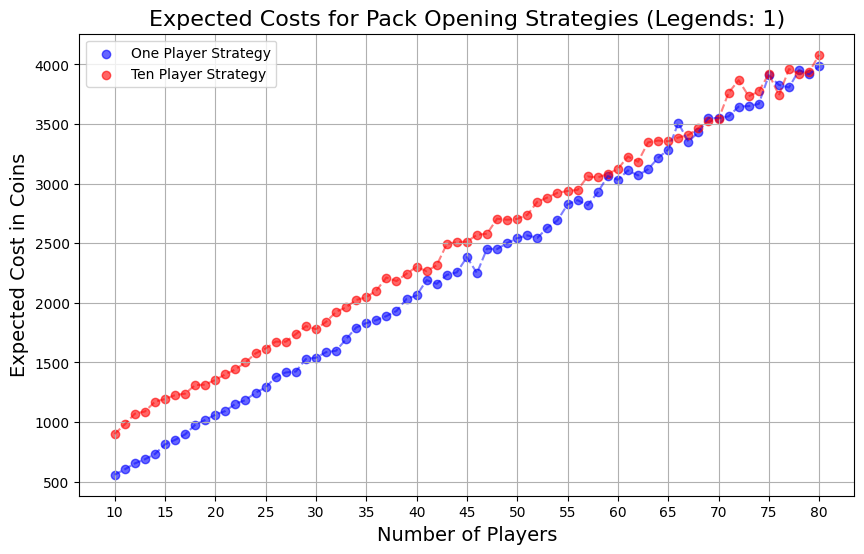

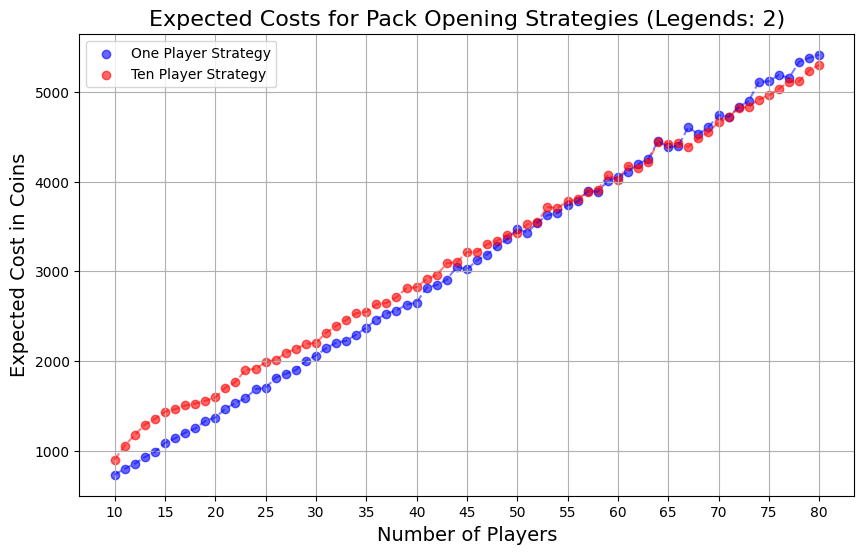

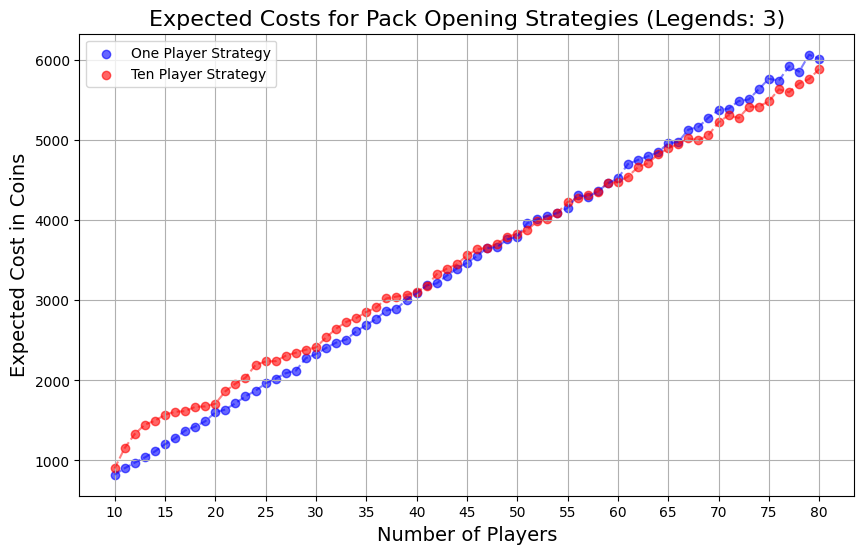

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# @title Optimal Switch Point
# Simulation parameters
num_trials = 1000  # Number of trials for the simulation

def simulate_pack_opening_one_player_at_a_time(num_players, num_legends, num_trials=1000):
    total_spins_to_get_all_legends = []

    for _ in range(num_trials):
        pack = list(range(1, num_players + 1))
        legends = set(range(1, num_legends + 1))
        spins = 0

        while legends:
            spins += 1
            player_pulled = np.random.choice(pack, 1, replace=False)[0]
            pack.remove(player_pulled)
            if player_pulled in legends:
                legends.remove(player_pulled)

        total_spins_to_get_all_legends.append(spins)

    return np.mean(total_spins_to_get_all_legends)

def simulate_pack_opening_ten_players_at_a_time(num_players, num_legends, num_trials=1000):
    total_spins_to_get_all_legends = []

    for _ in range(num_trials):
        pack = list(range(1, num_players + 1))
        legends = set(range(1, num_legends + 1))
        spins = 0

        while legends:
            spins += 1

            num_to_draw = min(10, len(pack))
            players_pulled = np.random.choice(pack, num_to_draw, replace=False)
            pack = [player for player in pack if player not in players_pulled]
            legends -= set(players_pulled)

        total_spins_to_get_all_legends.append(spins)

    return np.mean(total_spins_to_get_all_legends)

# Function to automate testing over varying numbers of players and legends
def find_optimal_strategy(player_range, legend_range):
    results = []

    for num_players in player_range:
        for num_legends in legend_range:
            average_spins_one_player = simulate_pack_opening_one_player_at_a_time(num_players, num_legends)
            average_spins_ten_players = simulate_pack_opening_ten_players_at_a_time(num_players, num_legends)

            total_coins_one_player = average_spins_one_player * 100
            total_coins_ten_players = average_spins_ten_players * 900

            results.append((num_players, num_legends, total_coins_one_player, total_coins_ten_players))

            print(f"Players: {num_players}, Legends: {num_legends}, One Player Cost: {total_coins_one_player:.2f}, Ten Player Cost: {total_coins_ten_players:.2f}")

    return results

# Function to plot the results
def plot_results_by_legends(results):
    # Organizing results by number of legends
    results_by_legends = {1: [], 2: [], 3: []}

    for players, legends, one_player_cost, ten_player_cost in results:
        results_by_legends[legends].append((players, one_player_cost, ten_player_cost))

    # Create a figure
    for num_legends, data in results_by_legends.items():
        players = [result[0] for result in data]
        one_player_costs = [result[1] for result in data]
        ten_player_costs = [result[2] for result in data]

        plt.figure(figsize=(10, 6))
        plt.scatter(players, one_player_costs, color='blue', label='One Player Strategy', alpha=0.6)
        plt.scatter(players, ten_player_costs, color='red', label='Ten Player Strategy', alpha=0.6)

        # Create lines connecting points for clarity
        plt.plot(players, one_player_costs, color='blue', linestyle='--', alpha=0.5)
        plt.plot(players, ten_player_costs, color='red', linestyle='--', alpha=0.5)

        # Setting labels and title
        plt.title(f'Expected Costs for Pack Opening Strategies (Legends: {num_legends})', fontsize=16)
        plt.xlabel('Number of Players', fontsize=14)
        plt.ylabel('Expected Cost in Coins', fontsize=14)
        plt.xticks(range(min(players), max(players) + 1, 5))
        plt.legend()
        plt.grid()

        # Show the plot
        plt.show()

# Define ranges for players and legends
player_range = range(10, 81, 1)  # From 10 to 150 players
legend_range = range(1, 4)  # From 1 to 3 legends

# Find the optimal strategy based on the defined ranges
results = find_optimal_strategy(player_range, legend_range)

# Plot the results
plot_results_by_legends(results)